## Visualizing of EcoFOCI Glider Locations from Science Data Set - single profiles


In [1]:
%matplotlib inline

In [3]:
import os

import xarray as xa
import numpy as np

import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Using profile 262 which was corrected for the 0.5 threshold but not any other thresholds

In [4]:
xa1p5d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4010262_d.nc',autoclose=True)
xa1p5u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4010262_u.nc',autoclose=True)
xa1p0d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4010262_d.nc',autoclose=True)
xa1p0u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4010262_u.nc',autoclose=True)
xa0p5 = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/0p5_dtdz/'+'p4010262_m.nc',autoclose=True)

### Plot the Upcast/Downcast and Corrected Merged Profile

*** Since the 1.5 deg/m and 1.0 deg/m thresholds did not result in a merged profile, only plot 1.5 ***

(66.1, -2.1)

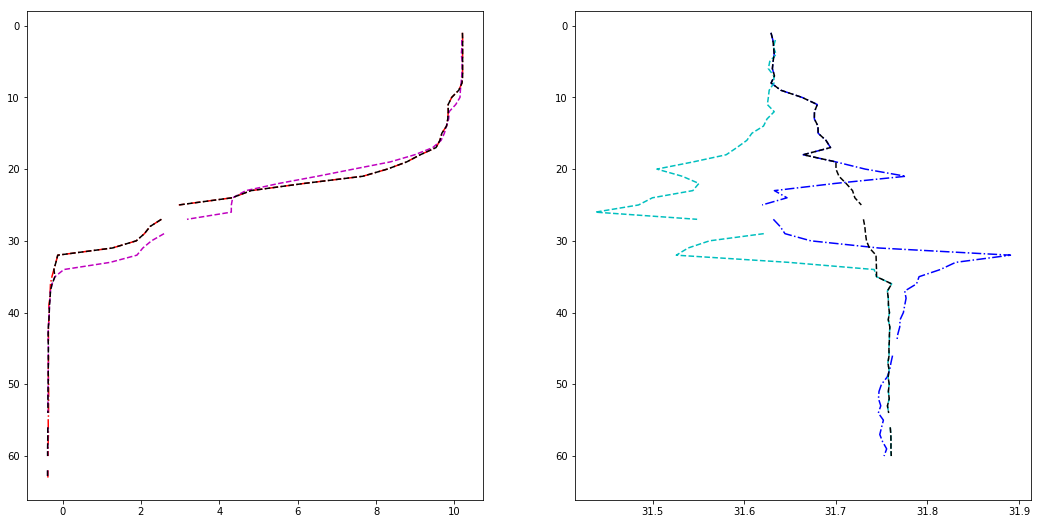

In [6]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xa1p5d.Temperature,xa1p5d.Pressure,'r-.')
plt.plot(xa1p5u.Temperature,xa1p5d.Pressure,'m--')
plt.plot(xa0p5.Temperature,xa0p5.Pressure,'k--')
ax1.invert_yaxis()
yr=ax1.get_ylim()
ax1 = fig.add_subplot(122)
plt.plot(xa1p5d.Salinity,xa1p5d.Pressure,'b-.')
plt.plot(xa1p5u.Salinity,xa1p5d.Pressure,'c--')
plt.plot(xa0p5.Salinity,xa0p5.Pressure,'k--')
plt.ylim(yr)


** in the above plots, the black lines are the "merged" or corrected data set if the sharpness threshold was met, The dark blue/red are the downcast data and the light blue/red are the upcast data for the same profile - bin averaged to 1m

*** Using profile 1800 which was corrected for the 0.5 threshold but not any other thresholds ***

In [7]:
xa1p5d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4011800_d.nc',autoclose=True)
xa1p5u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p5_dtdz/'+'p4011800_u.nc',autoclose=True)
xa1p0d = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4011800_d.nc',autoclose=True)
xa1p0u = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/1p0_dtdz/'+'p4011800_u.nc',autoclose=True)
xa0p5 = xa.open_mfdataset('/Users/bell/Programs/Python/EcoFOCI_OculusGlider/data/0p5_dtdz/'+'p4011800_m.nc',autoclose=True)

(67.15, -2.1500000000000004)

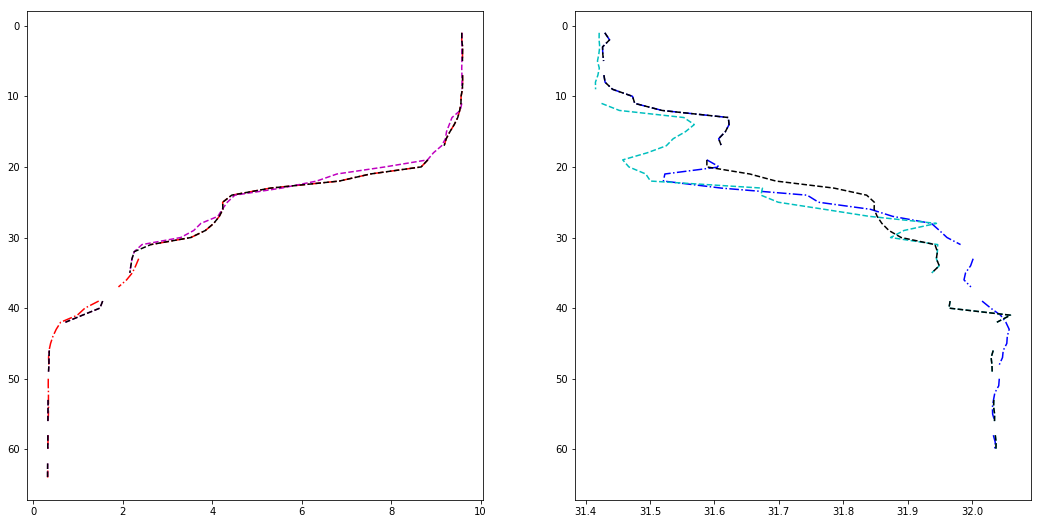

In [8]:
fig = plt.figure(3, figsize=(18,9), facecolor='w', edgecolor='w')
ax1 = fig.add_subplot(121)
plt.plot(xa1p5d.Temperature,xa1p5d.Pressure,'r-.')
plt.plot(xa1p5u.Temperature,xa1p5d.Pressure,'m--')
plt.plot(xa0p5.Temperature,xa0p5.Pressure,'k--')
ax1.invert_yaxis()
yr=ax1.get_ylim()
ax1 = fig.add_subplot(122)
plt.plot(xa1p5d.Salinity,xa1p5d.Pressure,'b-.')
plt.plot(xa1p5u.Salinity,xa1p5d.Pressure,'c--')
plt.plot(xa0p5.Salinity,xa0p5.Pressure,'k--')
plt.ylim(yr)
